# Data Science & Business Analytics Internship at The Sparks Foundation (Feb 2021)

## __Author: Soma Dey__

## Task 2 : Prediction using Unsupervised Machine Learning

#### _Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually._

### 1. Importing the dataset and all required libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Load Iris.csv into a pandas dataFrame
iris_data= pd.read_csv("C:/Users/SOMA/Documents/The_Spark_Foundation/Task-2/Iris.csv")

In [22]:
#Read the dataset
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

+ **By the value counts we can see that it is a balanced datatset**

In [24]:
iris_data.shape

(150, 6)

+ **This dataset has 150 rows and 6 columns**

In [25]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


+ **There is no null value in any rows and columns, so data cleaning not needed**

In [26]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2. Finding the optimum number of clusters

Text(0.5, 1.0, 'Elbow Graph')

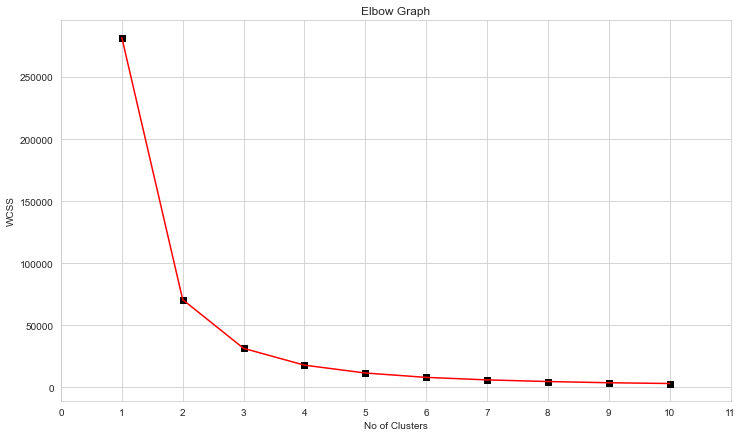

In [27]:
from sklearn.cluster import KMeans
x = iris_data.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


#Ploting Elbow Method
plt.figure(figsize=(12,7)) 
plt.scatter(range(1, 11), wcss,marker="s",c="black")       
plt.plot(range(1, 11), wcss,c="red")
plt.xlabel("No of Clusters")           
plt.ylabel("WCSS")

#for value of k from 0 to 11 in graph
plt.xticks(range(0,12,1)) 
plt.title("Elbow Graph")

+ **In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters**

+ **From the graph the elbow point is 3 and hence optimum no. of cluster is 3**

### 3. Modeling and visualization

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0, precompute_distances = 'auto', tol = 0.0001, verbose = 0)
y_kmeans = kmeans.fit_predict(x)

#predicted values
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

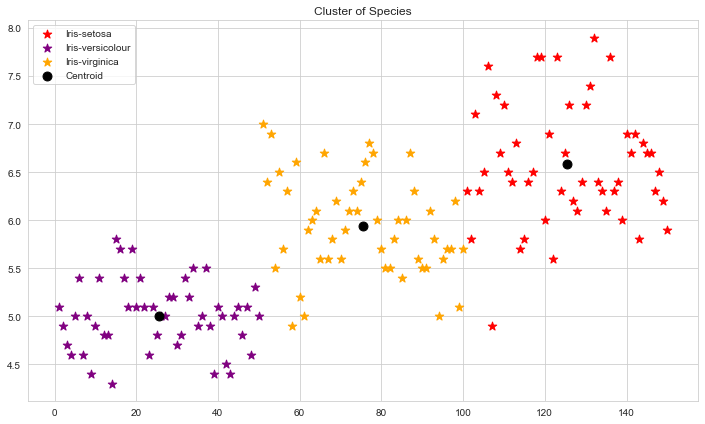

In [31]:
#Visualizing the K-means Clusters
sns.set_style("whitegrid");
plt.figure(figsize=(12,7))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s = 80,c = 'red', label = 'Iris-setosa' ,marker="*")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s = 80,c = 'purple', label = 'Iris-versicolour' ,marker="*")
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s = 80,c = 'orange', label = 'Iris-virginica' ,marker="*")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

## Thank You